<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%224_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

# Новый раздел

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)
    ]).T

In [5]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/SkillBox/non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


собираем данные:

In [10]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

обучаем модели на тренировочных данных:

In [11]:
model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.713e+00, tolerance: 2.448e-03
  model = cd_fast.enet_coordinate_descent(


Делаем предсказания на обеих моделях для тренировочных и валидационных данных:

In [8]:
y_pred_ridge = model_ridge.predict(X_valid)
y_pred_train_ridge = model_ridge.predict(X_train)
y_pred_lasso = model_lasso.predict(X_valid)
y_pred_train_lasso = model_lasso.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.713e+00, tolerance: 2.448e-03
  model = cd_fast.enet_coordinate_descent(


Вычисляем MSE на обучении и валидации для обеих моделей:

In [22]:
mse_ridge_train = mean_squared_error(y_train, y_pred_train_ridge)
mse_ridge = mean_squared_error(y_valid, y_pred_ridge)
mse_lasso_train = mean_squared_error(y_train, y_pred_train_lasso)
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)

mse_dict = {'mse_ridge_train': mse_ridge_train,
        'mse_ridge': mse_ridge,
        'mse_lasso_train': mse_lasso_train,
        'mse_lasso': mse_lasso}

Строим график:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

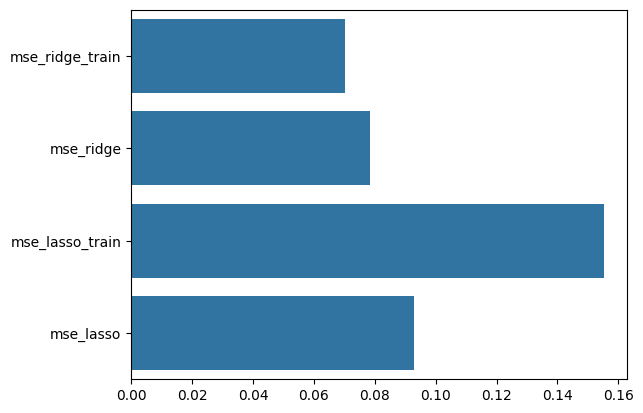

In [23]:
sns.barplot(x=mse_dict.values(), y=mse_dict.keys())

Вижу, что модель Лассо дает сильно меньшее качество данных на тренировочной выборке и немного меньшее - на валидационной.

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!